<a href="https://colab.research.google.com/github/kylelee417/CollabProject/blob/master/Copy_of_collab_project_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
print("Library imported!")

Library imported!


In [2]:
url = 'https://raw.githubusercontent.com/kylelee417/CollabProject/master/Data/Admission_Predict.csv'
ga_df = pd.read_csv(url)

In [3]:
ga_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ga_df.columns = list(map(lambda col: col.strip(),ga_df.columns))

In [5]:

threshold = 0.7 #arbitrary
ga_df['likeness'] = ga_df['Chance of Admit'].apply(lambda chance: 1 if chance>threshold else 0)
ga_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,likeness
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


### Define X and y values

In [6]:
X = np.asarray(ga_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']])
X[0:5]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ]])

In [7]:
y = np.asarray(ga_df['likeness'])
y [0:5]

array([1, 1, 1, 1, 0])

### Normalizing X values

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.81923762,  1.77886545,  0.77558214,  1.13735981,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, -0.37777315,  0.01730621,
        -0.95404281,  0.88640526],
       [ 0.48990382,  0.46216267, -0.09979274,  0.12727117, -1.06433187,
         0.15484742,  0.88640526],
       [-0.21907421, -0.68995225, -0.97516761, -1.3878618 , -0.52351283,
        -0.6064802 , -1.12815215]])

### Train and Test data set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (375, 7) (375,)
Test set: (125, 7) (125,)


### Modeling Logistic Regression with Scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [12]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.5812453 , 0.4187547 ],
       [0.52878934, 0.47121066],
       [0.30122034, 0.69877966],
       [0.0908414 , 0.9091586 ],
       [0.27544671, 0.72455329],
       [0.57366857, 0.42633143],
       [0.27119976, 0.72880024],
       [0.20582   , 0.79418   ],
       [0.46501123, 0.53498877],
       [0.69442345, 0.30557655]])

### Evaluation - Jaccard Index
#### Accuracy Testing
If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.|

In [13]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.84

###  Confusin Matrix

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[57 13]
 [ 7 48]]


Confusion matrix, without normalization
[[57 13]
 [ 7 48]]


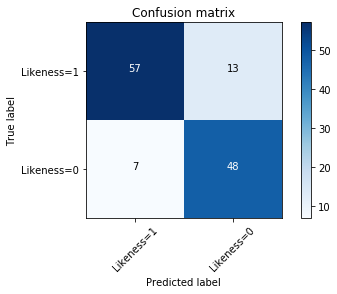

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Likeness=1','Likeness=0'],normalize= False,  title='Confusion matrix')

The first row is for candidates whose actual likeness value in test set is 1.
As we calculated the test set, out of 125 candidates, the likeness value of 70 of them is 1. 
And out of these 70, the model correctly predicted 57 of them as 1, and 13 of them as 0. 

It means, for 57 customers, the actual likeness value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 13 customers were 1, the classifier predicted those as 0, which we can consider it as error of the model.

It looks like there were 25 customers whom their churn value were 0. The classifier correctly predicted 48 of them as 0, and 7 of them wrongly as 1. 

In [16]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        55
           1       0.89      0.81      0.85        70

   micro avg       0.84      0.84      0.84       125
   macro avg       0.84      0.84      0.84       125
weighted avg       0.84      0.84      0.84       125



Based on the count of each section, we can calculate precision and recall of each label:

Precision: a measure of the accuracy provided that a class label has been predicted.
Recall: a true positive rate. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.84 in our case.

### Log loss Evaluation

In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.38977348196407

Eigendecomposition - Computing Eigenvectors and Eigenvalues
Covariance Matrix


In [38]:
import numpy as np
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.   0.83 0.64 0.61 0.53 0.83 0.56]
 [0.83 1.   0.65 0.65 0.54 0.81 0.47]
 [0.64 0.65 1.   0.73 0.61 0.71 0.43]
 [0.61 0.65 0.73 1.   0.67 0.71 0.41]
 [0.53 0.54 0.61 0.67 1.   0.64 0.37]
 [0.83 0.81 0.71 0.71 0.64 1.   0.5 ]
 [0.56 0.47 0.43 0.41 0.37 0.5  1.  ]]


In [20]:
cov_mat = np.cov(x.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.4   0.27  0.36 -0.14 -0.74  0.25  0.05]
 [ 0.4   0.11  0.46 -0.13  0.26 -0.73 -0.03]
 [ 0.38 -0.25 -0.09  0.64 -0.03 -0.03  0.61]
 [ 0.38 -0.34 -0.17  0.33 -0.12 -0.02 -0.76]
 [ 0.35 -0.43 -0.46 -0.65 -0.09 -0.1   0.21]
 [ 0.42  0.02  0.24 -0.14  0.59  0.63 -0.02]
 [ 0.29  0.74 -0.59  0.07  0.11 -0.07 -0.04]]

Eigenvalues 
[4.74 0.74 0.56 0.38 0.15 0.18 0.26]


Correlation Matrix

In [21]:
cor_mat1 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.4   0.27  0.36 -0.14 -0.74  0.25  0.05]
 [ 0.4   0.11  0.46 -0.13  0.26 -0.73 -0.03]
 [ 0.38 -0.25 -0.09  0.64 -0.03 -0.03  0.61]
 [ 0.38 -0.34 -0.17  0.33 -0.12 -0.02 -0.76]
 [ 0.35 -0.43 -0.46 -0.65 -0.09 -0.1   0.21]
 [ 0.42  0.02  0.24 -0.14  0.59  0.63 -0.02]
 [ 0.29  0.74 -0.59  0.07  0.11 -0.07 -0.04]]

Eigenvalues 
[4.73 0.74 0.56 0.38 0.15 0.18 0.26]


Raw data correlation matrix

In [22]:
X = ga_df.loc[:, features].values

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.4   0.27  0.36 -0.14 -0.74  0.25  0.05]
 [ 0.4   0.11  0.46 -0.13  0.26 -0.73 -0.03]
 [ 0.38 -0.25 -0.09  0.64 -0.03 -0.03  0.61]
 [ 0.38 -0.34 -0.17  0.33 -0.12 -0.02 -0.76]
 [ 0.35 -0.43 -0.46 -0.65 -0.09 -0.1   0.21]
 [ 0.42  0.02  0.24 -0.14  0.59  0.63 -0.02]
 [ 0.29  0.74 -0.59  0.07  0.11 -0.07 -0.04]]

Eigenvalues 
[4.73 0.74 0.56 0.38 0.15 0.18 0.26]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:


*   Eigendecomposition of the covariance matrix after standardizing the data.
*   Eigendecomposition of the correlation matrix.
*   Eigendecomposition of the correlation matrix after standardizing the data.




Singular Vector Decomposition (SVD)

In [23]:
u,s,v = np.linalg.svd(x.T)
u

array([[-0.4 ,  0.27, -0.36,  0.14, -0.05,  0.25, -0.74],
       [-0.4 ,  0.11, -0.46,  0.13,  0.03, -0.73,  0.26],
       [-0.38, -0.25,  0.09, -0.64, -0.61, -0.03, -0.03],
       [-0.38, -0.34,  0.17, -0.33,  0.76, -0.02, -0.12],
       [-0.35, -0.43,  0.46,  0.65, -0.21, -0.1 , -0.09],
       [-0.42,  0.02, -0.24,  0.14,  0.02,  0.63,  0.59],
       [-0.29,  0.74,  0.59, -0.07,  0.04, -0.07,  0.11]])

Selecting Principle Components

In [24]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


Sorting eigenpairs

In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.726354016037277
0.7417512338111243
0.5616278442361815
0.38036527284245214
0.26367658844902525
0.1782791139759777
0.14794593064797465


In [26]:
import plotly.plotly as py


tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,8)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,8)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)


In [27]:

import plotly 
plotly.tools.set_credentials_file(username='kyle417', api_key='HRS4CVbBu3CntlU5qNqN')

In [28]:
py.iplot(fig, filename='pc plot')

In [29]:
trace1

{'name': 'Individual',
 'type': 'bar',
 'x': ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'],
 'y': [67.5193430862467,
  10.596446197301757,
  8.023254917659722,
  5.433789612035022,
  3.76680840641464,
  2.546844485371106,
  2.113513294971063]}

In [30]:
trace2

{'name': 'Cumulative',
 'type': 'scatter',
 'x': ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'],
 'y': array([ 67.52,  78.12,  86.14,  91.57,  95.34,  97.89, 100.  ])}

The plot above clearly shows that most of the variance (67.52% of the variance) can be explained by the first principal component alone. The second principal component still bears some information (10.60%) while the third (8.02%) and the rest principal components can be dropped with some losing information. Together, the first two principal components contain 78.12% of the information.

In [31]:
from sklearn.preprocessing import StandardScaler
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
# Separating out the features
x = ga_df.loc[:, features].values
# Separating out the target
y = ga_df.loc[:,['likeness']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [33]:
targetComponets = y
targetDf = pd.DataFrame(data = targetComponets, columns = ['target'])

In [34]:
finalDf = pd.concat([principalDf, targetDf[['target']]], axis = 1)

In [35]:
finalDf.head()

,principal component 1,principal component 2,target
0,-3.568375,-0.328318,1
1,-1.639199,0.034550,1
2,0.550991,-0.720794,1
3,-0.345470,-1.280237,1
4,2.035804,0.039366,0


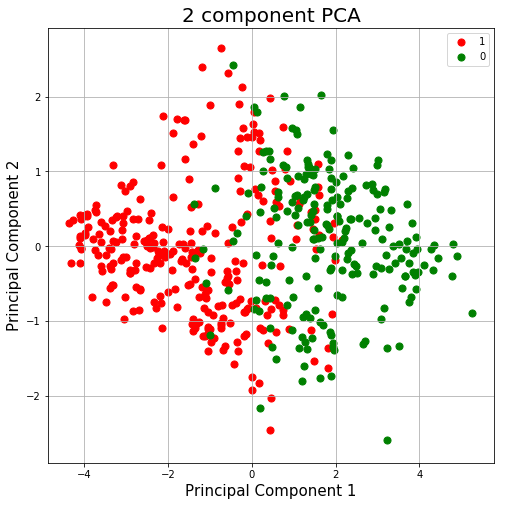

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [37]:
pca.explained_variance_ratio_

array([0.68, 0.11])